
Regression Assignment

This notebook completes three tasks:

1. Linear Regression (Hockey data): 
   - Fit Goals (G) → Points (PTS) (simple linear regression)  
   - Fit Goals (G) & Assists (A) → Points (PTS) (multiple linear regression)  
   - Compare the two fits

2. Logistic Regression (538 Avengers):
   - Predict Death1 from interesting predictors (we'll use Appearances and Gender for clarity)  
   - Make a probability prediction for a chosen character (editable variable)

3. Own Regression (Olympic 100m): 
   - Model 100m Time vs Year  
   - Show a linear and a simple asymptotic (reciprocal) model  
   - Predict for 2024 and 2300 and discuss validity

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix

# Make plots a bit larger
plt.rcParams['figure.figsize'] = (7, 5)


Matplotlib is building the font cache; this may take a moment.


Part 1 — Linear Regression (Hockey)

Task: Fit (i) a simple linear regression of Goals (G) vs Points (PTS) and (ii) a multiple regression of Goals (G) and Assists (A) vs Points (PTS). 


Simple regression (PTS ~ G)
  Intercept: 3.737243159603885
  Slope for G: 2.176780454522569
  R^2: 0.8461669386312143

Multiple regression (PTS ~ G + A)
  Intercept: -1.4210854715202004e-14
  Coeffs [G, A]: [1. 1.]
  R^2: 1.0


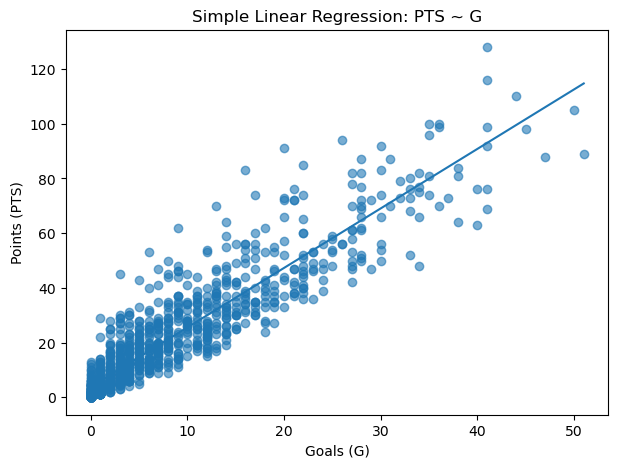

In [7]:

# Load hockey dataset
hock_url = 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv'
hock = pd.read_csv(hock_url)

# Simple linear regression: PTS ~ G
X_simple = hock[['G']].values
y_pts = hock['PTS'].values
lin_simple = LinearRegression().fit(X_simple, y_pts)
r2_simple = lin_simple.score(X_simple, y_pts)

# Multiple linear regression: PTS ~ G + A
X_multi = hock[['G', 'A']].values
lin_multi = LinearRegression().fit(X_multi, y_pts)
r2_multi = lin_multi.score(X_multi, y_pts)

print("Simple regression (PTS ~ G)")
print("  Intercept:", lin_simple.intercept_)
print("  Slope for G:", lin_simple.coef_[0])
print("  R^2:", r2_simple)
print()
print("Multiple regression (PTS ~ G + A)")
print("  Intercept:", lin_multi.intercept_)
print("  Coeffs [G, A]:", lin_multi.coef_)
print("  R^2:", r2_multi)

# Plot simple regression fit
plt.scatter(hock['G'], hock['PTS'], alpha=0.6)
x_line = np.linspace(hock['G'].min(), hock['G'].max(), 200).reshape(-1,1)
y_line = lin_simple.predict(x_line)
plt.plot(x_line, y_line)
plt.xlabel('Goals (G)')
plt.ylabel('Points (PTS)')
plt.title('Simple Linear Regression: PTS ~ G')
plt.show()


Part 2 — Logistic Regression (538 Avengers)

Task: Predict Death1 (first time a character died) using selected predictors.  


In [9]:

# Load Avengers dataset
# (This curated copy is CSV-formatted without the .csv extension.)
avengers_url = 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers'
ave = pd.read_csv(avengers_url)

# Target: Death1 -> binary
# Map YES/NO to 1/0; drop rows without Death1
ave = ave.copy()
ave['Death1'] = ave['Death1'].map({'YES': 1, 'NO': 0})
ave = ave.dropna(subset=['Death1'])

# Clean predictors
# Gender: map MALE->1, FEMALE->0, others to NaN then drop
ave['Gender'] = ave['Gender'].map({'MALE': 1, 'FEMALE': 0})
# Appearances: ensure numeric
ave['Appearances'] = pd.to_numeric(ave['Appearances'], errors='coerce')

# Keep needed rows
ave_model = ave.dropna(subset=['Gender', 'Appearances'])
X = ave_model[['Appearances', 'Gender']].values
y = ave_model['Death1'].values

# Fit logistic regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X, y)

acc = log_reg.score(X, y)
print("Training Accuracy:", acc)
print("Coefficients [Appearances, Gender]:", log_reg.coef_[0])
print("Intercept:", log_reg.intercept_[0])

# Confusion matrix & report (in-sample, for quick look)
pred = log_reg.predict(X)
print("\nConfusion Matrix:\n", confusion_matrix(y, pred))
print("\nClassification Report:\n", classification_report(y, pred))

# Probability for a chosen favorite character
fav_name = "Tony Stark"  
mask = ave_model['Name/Alias'].str.contains(fav_name, case=False, na=False)
if mask.any():
    row = ave_model.loc[mask].iloc[0]
    prob = log_reg.predict_proba([[row['Appearances'], row['Gender']]])[0,1]
    print(f"Estimated probability Death1=1 for '{row['Name/Alias']}' :", prob)
else:
    print(f"No match found for '{fav_name}'. Try another name present in 'Name/Alias'.")


Training Accuracy: 0.6473988439306358
Coefficients [Appearances, Gender]: [0.00067748 0.08159546]
Intercept: -0.7445874294325121

Confusion Matrix:
 [[98  6]
 [55 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       104
           1       0.70      0.20      0.31        69

    accuracy                           0.65       173
   macro avg       0.67      0.57      0.54       173
weighted avg       0.66      0.65      0.58       173

No match found for 'Tony Stark'. Try another name present in 'Name/Alias'.



Part 3 — Find Your Own Regression (Olympic 100m)

Task: Use Olympic 100m data and fit a model to predict Time.  
We'll build two models:

1. Linear model: `Time ~ Year`  
2. Asymptotic reciprocal model:** `Time ~ a + b / (Year - 1890)` (implemented as linear regression on the transformed feature)

Then we:
- Visualize both fits,
- Compare R²,
- Predict 2024 and 2300,
- Discuss validity.


Linear model R^2: 0.7966391665224197
Reciprocal model R^2: 0.8051450821748828
Linear intercept, slope: 35.20484192737674 -0.012762533581766192
Reciprocal intercept (a), slope on 1/(Year-1890) (b): 9.93887627426892 11.451479688771583


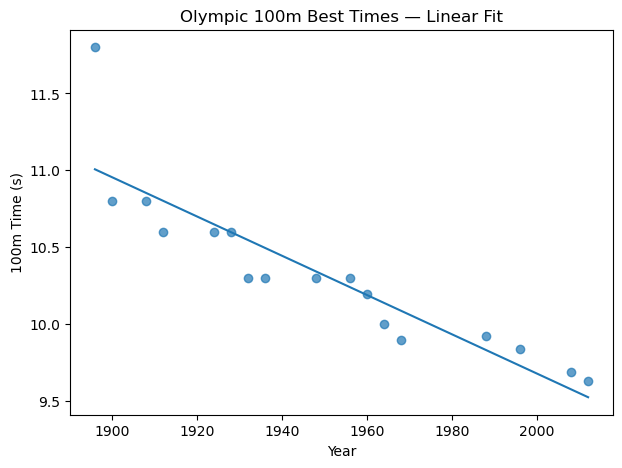

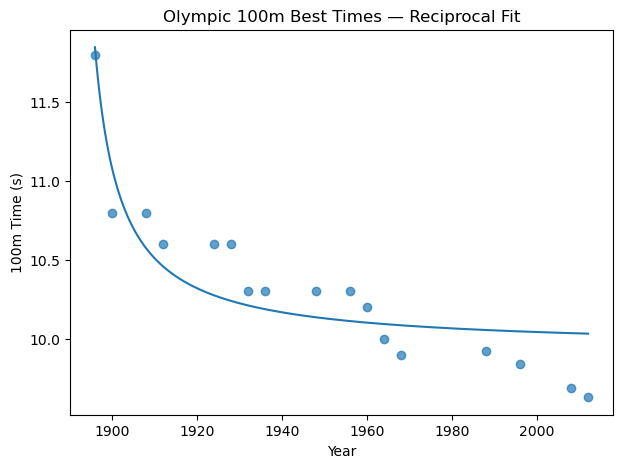

Year 2024 — Linear prediction: 9.373473957881966
Year 2024 — Reciprocal prediction: 10.024335077278716
Year 2300 — Linear prediction: 5.8510146893145
Year 2300 — Reciprocal prediction: 9.966806712466093


In [12]:

# Load and prepare Olympic 100m data
olymp_url = 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv'
ol = pd.read_csv(olymp_url)

ol = ol.copy()
ol = ol[ol['Gender'] == 'Men'].dropna(subset=['Games', 'Time'])

# Extract year from 'Games'
year_extracted = ol['Games'].astype(str).str.extract(r'(\d{4})')
ol['Year'] = pd.to_numeric(year_extracted[0], errors='coerce')
ol = ol.dropna(subset=['Year'])
ol['Year'] = ol['Year'].astype(int)

# For each Games, taking the best (min) Time to represent that Olympiad
best_by_games = (ol
                 .groupby('Year', as_index=False)
                 .agg(Time=('Time', 'min')))

# Linear regression: Time ~ Year
X_lin = best_by_games[['Year']].values
y_time = best_by_games['Time'].values
lr = LinearRegression().fit(X_lin, y_time)
r2_lin = lr.score(X_lin, y_time)

# Reciprocal model: Time ~ a + b / (Year - 1890)
eps = 1e-6
Z = 1.0 / (best_by_games['Year'].values - 1890 + eps)
X_rec = Z.reshape(-1, 1)
lr_rec = LinearRegression().fit(X_rec, y_time)
r2_rec = lr_rec.score(X_rec, y_time)

print("Linear model R^2:", r2_lin)
print("Reciprocal model R^2:", r2_rec)
print("Linear intercept, slope:", lr.intercept_, lr.coef_[0])
print("Reciprocal intercept (a), slope on 1/(Year-1890) (b):", lr_rec.intercept_, lr_rec.coef_[0])

# Plot data + linear fit
plt.scatter(best_by_games['Year'], best_by_games['Time'], alpha=0.7)
x_plot = np.linspace(best_by_games['Year'].min(), best_by_games['Year'].max(), 300).reshape(-1,1)
y_lin_fit = lr.predict(x_plot)
plt.plot(x_plot, y_lin_fit)
plt.xlabel('Year')
plt.ylabel('100m Time (s)')
plt.title('Olympic 100m Best Times — Linear Fit')
plt.show()

# Plot data + reciprocal fit
plt.scatter(best_by_games['Year'], best_by_games['Time'], alpha=0.7)
z_plot = 1.0 / (x_plot.flatten() - 1890 + eps)
y_rec_fit = lr_rec.predict(z_plot.reshape(-1,1))
plt.plot(x_plot, y_rec_fit)
plt.xlabel('Year')
plt.ylabel('100m Time (s)')
plt.title('Olympic 100m Best Times — Reciprocal Fit')
plt.show()

# Predictions for 2024 and 2300
def predict_linear(year):
    return lr.predict(np.array([[year]]))[0]

def predict_recip(year):
    z = 1.0 / (year - 1890 + eps)
    return lr_rec.predict(np.array([[z]]))[0]

for yr in [2024, 2300]:
    print(f"Year {yr} — Linear prediction:", predict_linear(yr))
    print(f"Year {yr} — Reciprocal prediction:", predict_recip(yr))
